### Creating An ANN using Pytorch

In [2]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
import seaborn as sns

In [5]:
import numpy as np
df['Outcome']=np.where(df['Outcome']==1,"Diabetic","No Diabetic")

In [6]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,Diabetic
1,85,66,29,0,26.6,0.351,31,No Diabetic
2,183,64,0,0,23.3,0.672,52,Diabetic
3,150,66,23,94,28.1,0.167,21,No Diabetic
4,150,40,35,168,43.1,2.288,33,Diabetic


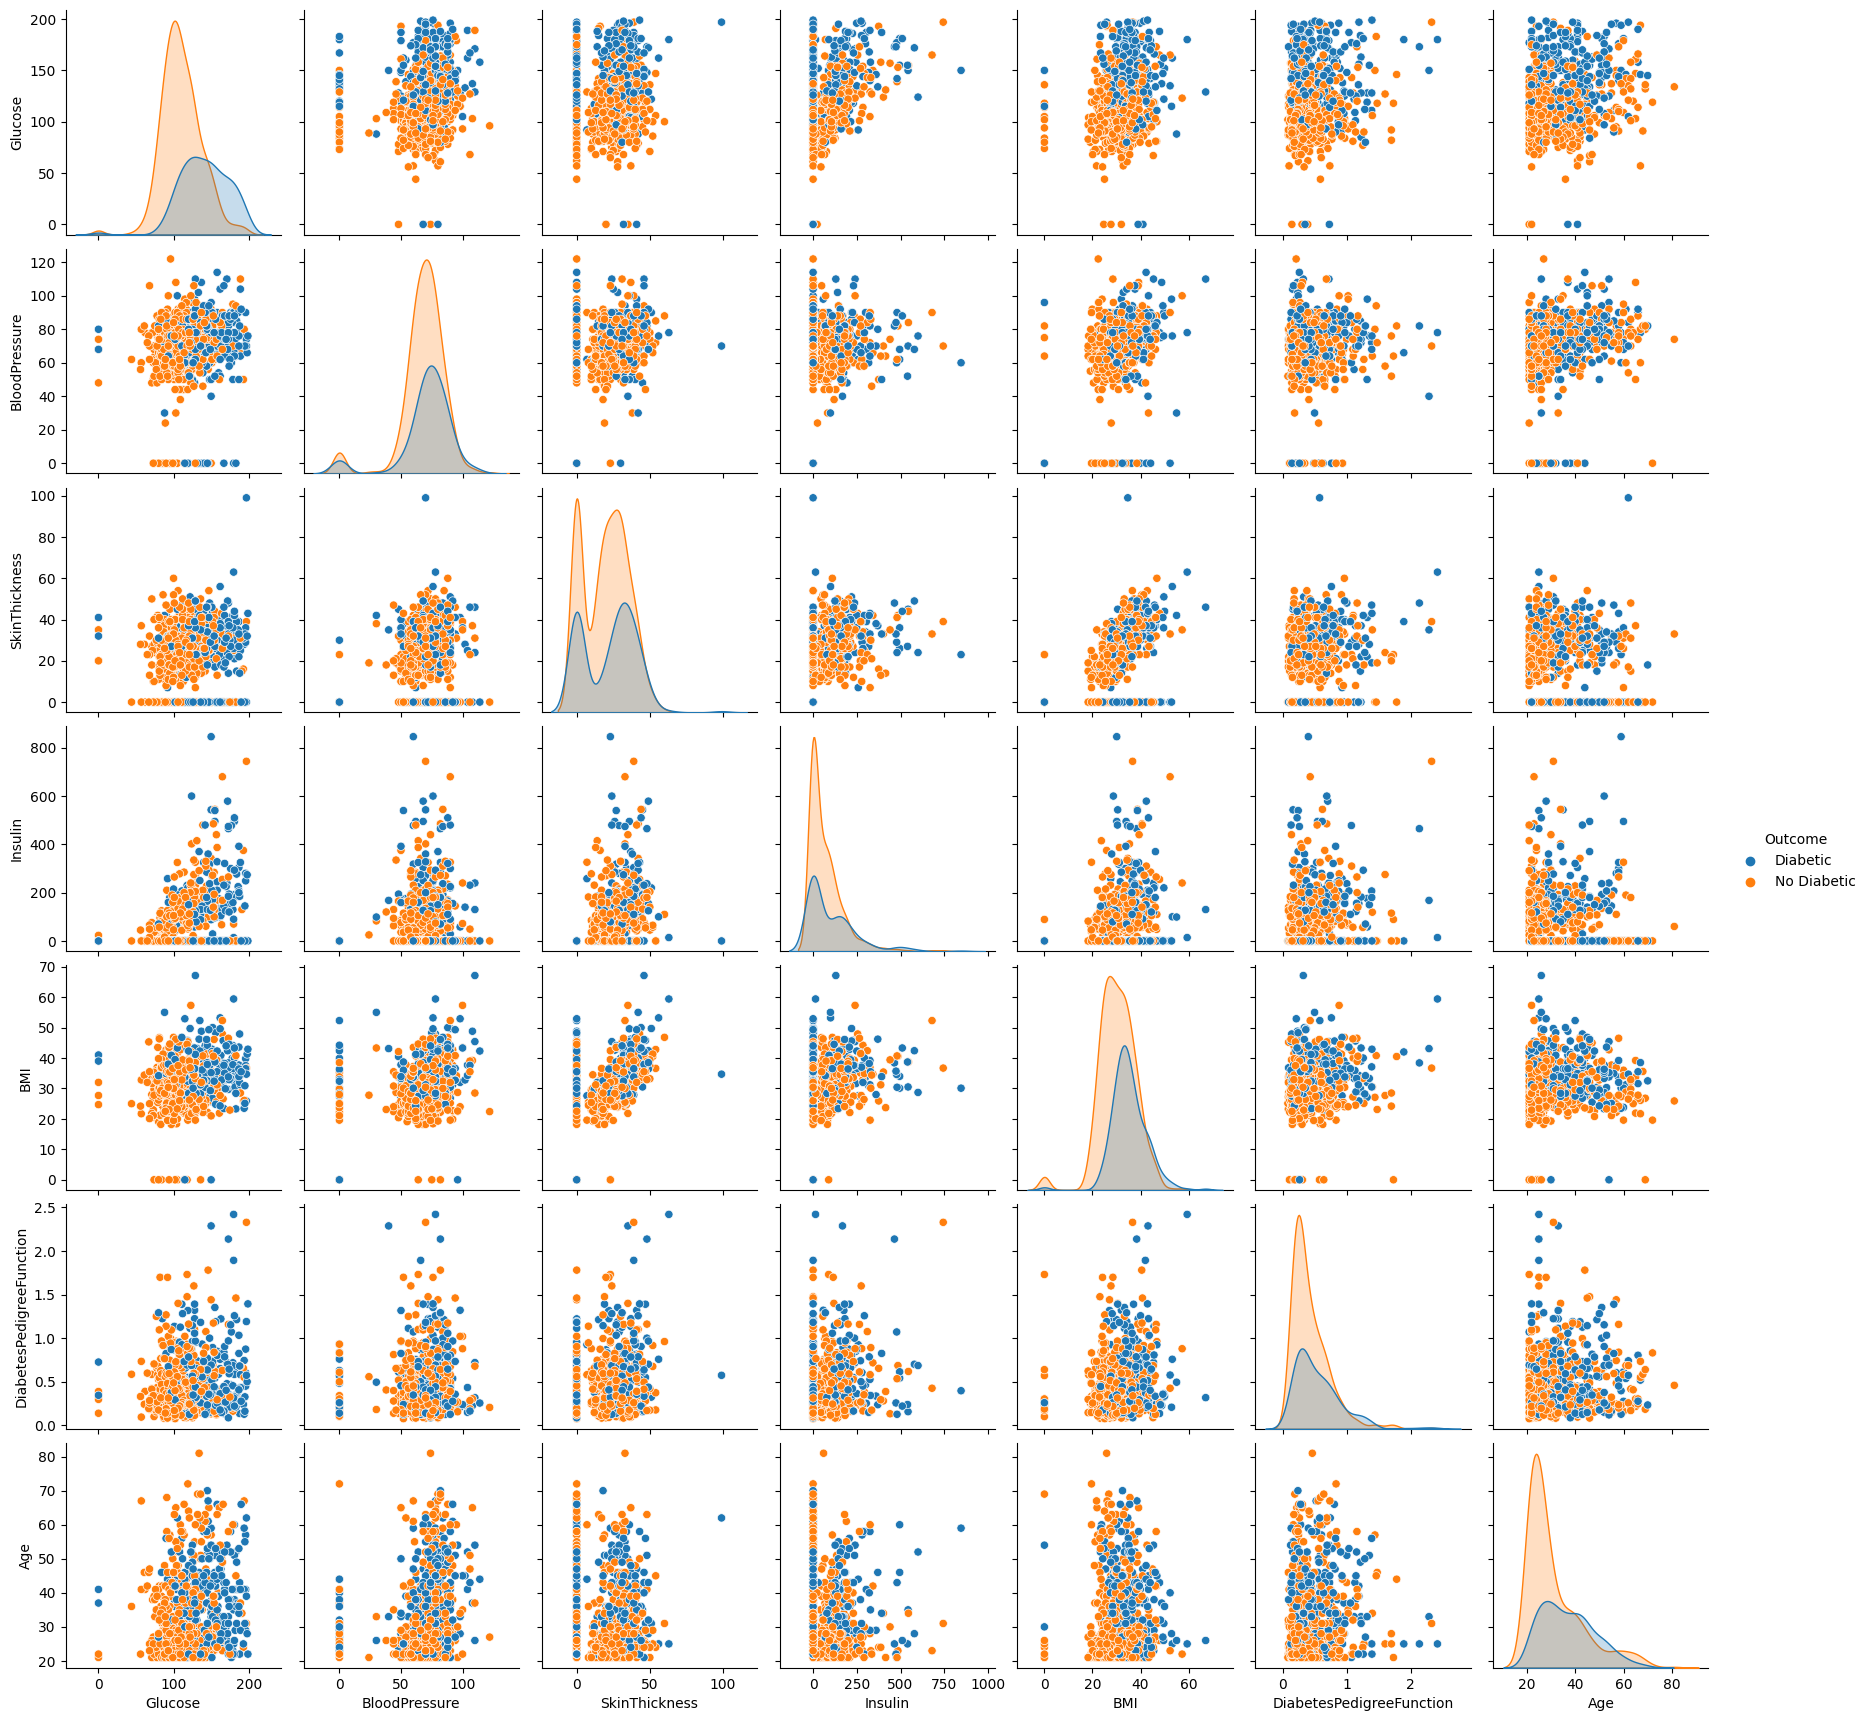

In [7]:
sns.pairplot(df,hue="Outcome")

In [8]:
df=pd.read_csv('diabetes.csv')
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1


In [9]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [12]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)


In [13]:
df.shape

(768, 8)

In [35]:
#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=7,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [36]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [37]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=7, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [38]:
###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [39]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 2.3863706588745117
Epoch number: 11 and the loss : 0.675639271736145
Epoch number: 21 and the loss : 0.6310423016548157
Epoch number: 31 and the loss : 0.6060978770256042
Epoch number: 41 and the loss : 0.5917946100234985
Epoch number: 51 and the loss : 0.582114577293396
Epoch number: 61 and the loss : 0.5727677941322327
Epoch number: 71 and the loss : 0.5632510185241699
Epoch number: 81 and the loss : 0.5540237426757812
Epoch number: 91 and the loss : 0.5449743866920471
Epoch number: 101 and the loss : 0.5363247990608215
Epoch number: 111 and the loss : 0.5275745391845703
Epoch number: 121 and the loss : 0.5179358124732971
Epoch number: 131 and the loss : 0.5072831511497498
Epoch number: 141 and the loss : 0.49490445852279663
Epoch number: 151 and the loss : 0.4812692701816559
Epoch number: 161 and the loss : 0.4691025912761688
Epoch number: 171 and the loss : 0.4586227238178253
Epoch number: 181 and the loss : 0.45665231347084045
Epoch number: 191 and t

In [40]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

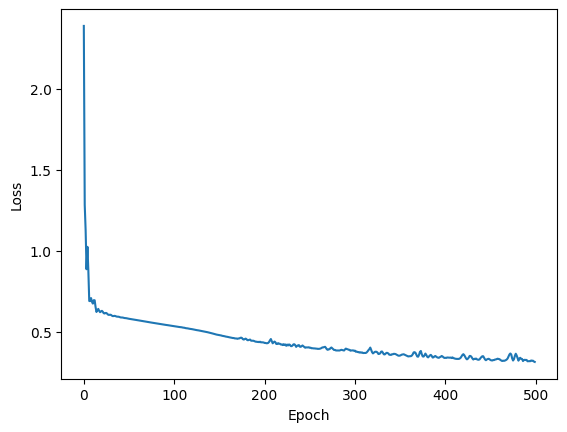

In [44]:
final_losses_tesnor = torch.tensor(final_losses)
final_losses_numpy = final_losses_tesnor.detach().numpy()
plt.plot(range(epochs),final_losses_numpy)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [45]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
1
1
1
0
0
0
0
1
0
0
1
1
0
1
0
0
1
0
1
0
0
1
0
0
1
0
1
1
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
1
0
0
1
0
1
1
0
1
0
0
0
0
1
1
0
1
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
1
0
0
1
0
1
0
1
1
1
0
1
0
1
0
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
1
0
0
0
0
1
0
1
0
0


In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[84, 23],
       [16, 31]], dtype=int64)

Text(95.72222222222221, 0.5, 'Predicted Values')

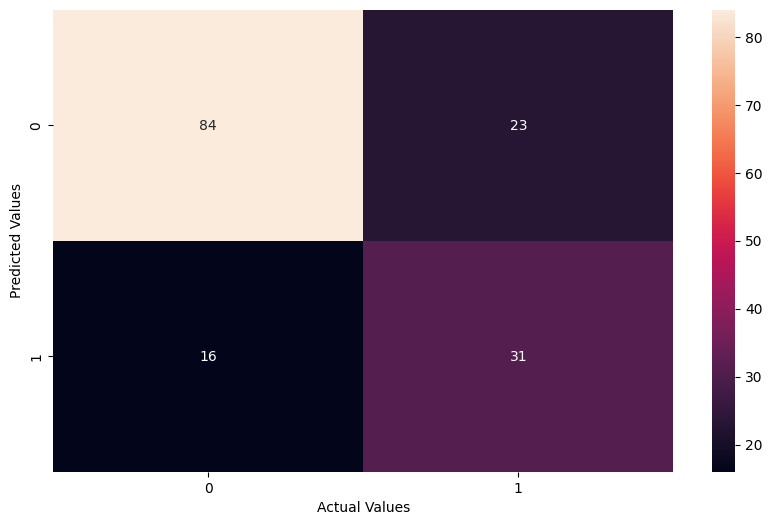

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [48]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7467532467532467

In [49]:
#### Save the model
torch.save(model,'diabetes.pt')

In [50]:
#### Save And Load the model
model=torch.load('diabetes.pt')

In [51]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=7, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [52]:
### Predcition of new data point
list(df.iloc[0,:-1])

[148.0, 50.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [53]:
#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [54]:
new_data=torch.tensor(lst1)

In [56]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x8 and 7x20)